In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
games_df = pd.read_csv("games.csv")

In [45]:
games_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [46]:
def getwinners(r1, r2, winner):
    return len(games_df[(games_df[r1]>games_df[r2])&(games_df['winner']==winner)])*100/len(games_df[games_df[r1]>games_df[r2]])

In [47]:
print('Win percentage of white when white has a higher rating:', round(getwinners('white_rating', 'black_rating', 'white')))
print('Win percentage of black when white has a higher rating:', round(getwinners('white_rating', 'black_rating', 'black')))
print('Win percentage of black when black has a higher rating:', round(getwinners('black_rating', 'white_rating', 'black')))
print('Win percentage of white when black has a higher rating:', round(getwinners('black_rating', 'white_rating', 'white')))

Win percentage of white when white has a higher rating: 64
Win percentage of black when white has a higher rating: 31
Win percentage of black when black has a higher rating: 60
Win percentage of white when black has a higher rating: 35


As expected, the player with the higher rating usually wins the game. However, there is a difference of 4 percent between the black and white win percentage in each scenario-Almost like white has an advantage...

In [48]:
games_df['avrating'] = (games_df['white_rating']+games_df['black_rating'])/2

In [49]:
games_df.groupby('rated').agg({'avrating': 'mean'})

,avrating
rated,
False,1582.091596
True,1595.302600


There isn't much of a difference between player ratings in rated and unrated matches - about 13.2/1595 (less than one percent).

In [50]:
gamesrated = games_df[games_df['rated']]
gamesnotrated = games_df[~games_df['rated']]

In [51]:
print('Number of unrated games that white won:', len(gamesnotrated.query("winner == 'white'")))
print('Number of unrated games that black won:', len(gamesnotrated.query("winner == 'black'")))
print('Number of unrated games that ended in a draw:', len(gamesnotrated.query("winner == 'draw'")))

Number of unrated games that white won: 1949
Number of unrated games that black won: 1723
Number of unrated games that ended in a draw: 231


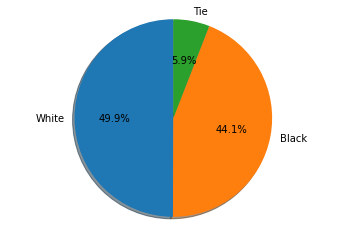

In [52]:
labels = 'White', 'Black', 'Tie'
sizes = [len(gamesnotrated.query("winner == 'white'"))*100/len(gamesnotrated), 
        len(gamesnotrated.query("winner == 'black'"))*100/len(gamesnotrated), 
        len(gamesnotrated.query("winner == 'draw'"))*100/len(gamesnotrated)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [53]:
print('Number of rated games that white won:', len(gamesrated.query("winner == 'white'")))
print('Number of rated games that black won:', len(gamesrated.query("winner == 'black'")))
print('Number of rated games that ended in a draw:', len(gamesrated.query("winner == 'draw'")))
len(gamesrated)

Number of rated games that white won: 8052
Number of rated games that black won: 7384
Number of rated games that ended in a draw: 719


16155

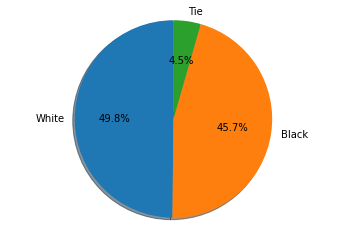

In [54]:
labels = 'White', 'Black', 'Tie'
sizes = [len(gamesrated.query("winner == 'white'"))*100/len(gamesrated), 
        len(gamesrated.query("winner == 'black'"))*100/len(gamesrated), 
        len(gamesrated.query("winner == 'draw'"))*100/len(gamesrated)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

The player playing white seems to have an obvious advantage over the player playing black, regardless of the ratings

In [55]:
games_df.groupby('winner').agg({'turns': 'mean'})

,turns
winner,
black,60.724388
draw,86.157895
white,57.790221


That's interesting. The matches that ended in a draw usually had more turns played than matches won by either side, as expected. However, the matches won by the player playing black seem to last more than 5 percent longer than those won by the player playing white.

In [56]:
games_df.groupby('rated').agg({'turns':'mean'})

,turns
rated,
False,54.271586
True,61.962550


The games that were rated generally had 7.7 more turns played per match than the unrated games

In [57]:
games150 = games_df.sample(150)

In [58]:
intercept, slope = np.polynomial.polynomial.polyfit(
    games150.avrating,
    games150.turns,
    1)
ratings = np.array([min(games150.avrating), max(games150.avrating)])
turns = intercept + slope * ratings

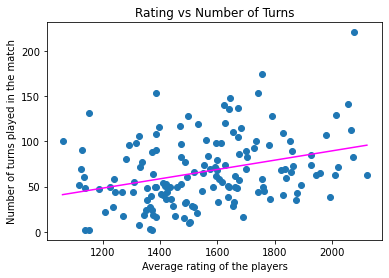

In [59]:
plt.scatter("avrating", "turns", data=games150)
plt.plot(ratings, turns, color="magenta")
plt.title("Rating vs Number of Turns")
plt.xlabel("Average rating of the players")
plt.ylabel("Number of turns played in the match")
plt.show()

Even though the turns per game were higher in rated games, the average rating of the players seemed to have no correlation with the turns played. The slight slope that can be seen seems to be
a result of the lack of data at the extreme ends

In [60]:
freq = games_df[games_df['winner']=='black']['opening_name'].value_counts()
print("Printing the frequency")
print(freq)

Printing the frequency
Van't Kruijs Opening                                                  226
Sicilian Defense                                                      194
Sicilian Defense: Bowdler Attack                                      164
Scandinavian Defense                                                  123
French Defense: Knight Variation                                      121
                                                                     ... 
Four Knights Game: Spanish Variation |  Symmetrical Variation #3        1
French Defense: Pelikan Variation                                       1
Pirc Defense: Classical Variation |  Quiet System |  Czech Defense      1
System: Double Duck Formation                                           1
Italian Game: Evans Gambit |  Stone-Ware Variation                      1
Name: opening_name, Length: 1145, dtype: int64


This series shows the openings with which the player playing black got the most wins.

In [61]:
print("Black win percentage when using the Van't Kruijs Opening:",
round(len(games_df[(games_df['opening_name']=="Van't Kruijs Opening")&(games_df['winner']=='black')])*100
/len(games_df[games_df['opening_name']=="Van't Kruijs Opening"]),2))
print('Black win percentage when using the Sicilian Defense:',
round(len(games_df[(games_df['opening_name']=="Sicilian Defense")&(games_df['winner']=='black')])*100
/len(games_df[games_df['opening_name']=="Sicilian Defense"]),2))
print('Black win percentage when using other openings: ', 
round(len(games_df[(games_df['winner']=='black')&(~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"]))])*100/len(games_df[~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"])]),2))

Black win percentage when using the Van't Kruijs Opening: 61.41
Black win percentage when using the Sicilian Defense: 54.19
Black win percentage when using other openings:  44.94


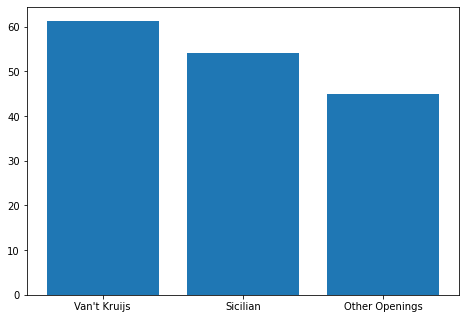

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
openings = ["Van't Kruijs", 'Sicilian', 'Other Openings']
percentages = [61.413, 54.19, len(games_df[(games_df['winner']=='black')&(~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"]))])*100/len(games_df[~games_df['opening_name'].isin(['Sicilian Defense', "Van't Kruijs Opening"])])]
ax.bar(openings, percentages)
plt.show()

We can see that the Van't Kruijs and Sicilain Defense openings provide black with a statistical advantage over the other openings

In [63]:
freq = games_df[games_df['winner']=='white']['opening_name'].value_counts()
print("Printing the frequency")
print(freq)

Printing the frequency
Scandinavian Defense: Mieses-Kotroc Variation                            164
Sicilian Defense                                                         149
Scotch Game                                                              145
French Defense: Knight Variation                                         135
Philidor Defense #3                                                      127
                                                                        ... 
Scotch Game: Malaniuk Variation                                            1
Sicilian Defense: Kan Variation |  Maroczy Bind |  Reti Variation          1
French Defense: Advance |  Steinitz Variation                              1
Budapest Defense                                                           1
Four Knights Game: Spanish Variation |  Rubinstein Variation Accepted      1
Name: opening_name, Length: 1181, dtype: int64


In [64]:
print('White win percentage when using the Scandinavian Defense: Mieses-Kotroc Variation:',
round(len(games_df[(games_df['opening_name']=="Scandinavian Defense: Mieses-Kotroc Variation")&(games_df['winner']=='white')])*100
/len(games_df[games_df['opening_name']=="Scandinavian Defense: Mieses-Kotroc Variation"]), 2))
print('White win percentage when using the Scotch Game:',
round(len(games_df[(games_df['opening_name']=="Scotch Game")&(games_df['winner']=='white')])*100
/len(games_df[games_df['opening_name']=="Scotch Game"]), 2))
print('White win percentage when using other openings:',
round(len(games_df[(games_df['winner']=='white')&(~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"]))])*100/len(games_df[~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"])]), 2))

White win percentage when using the Scandinavian Defense: Mieses-Kotroc Variation: 63.32
White win percentage when using the Scotch Game: 53.51
White win percentage when using other openings: 49.63


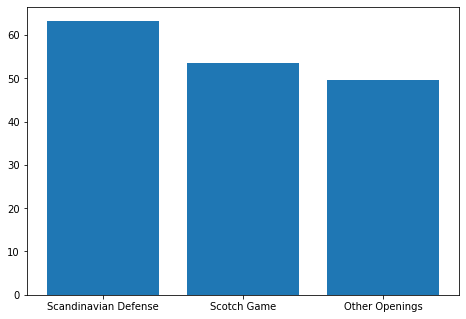

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
openings = ["Scandinavian Defense", 'Scotch Game', 'Other Openings']
percentages = [63.32, 53.506, len(games_df[(games_df['winner']=='white')&(~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"]))])*100/len(games_df[~games_df['opening_name'].isin(['Scandinavian Defense: Mieses-Kotroc Variation', "Scotch Game"])])]
ax.bar(openings, percentages)
plt.show()

The Scandinavian Defense: Mieses-Kotroc Variation and Scotch Game openings appear to provide white with a statistical advantage over the other openings